In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def linear_func(a: float, b: float, x: int) -> float:
    return a * x + b

In [24]:
x = list(range(0, 11))
y = [linear_func(2, 5, x) for x in x]
x, y

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])

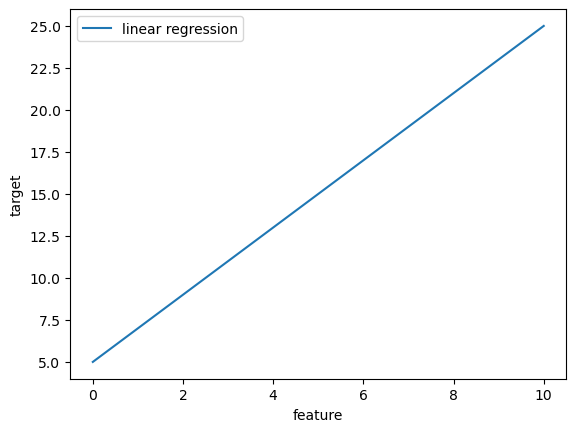

In [25]:
plt.plot(x, y, label='linear regression')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()

In [26]:
def mean_squared_error_2(X_actual, X_predicted):
    return sum((X_actual[i] - X_predicted[i]) ** 2 for i in range(len(X_actual))) / len(X_actual)

In [27]:
data = pd.read_csv('multiple_linear_regression_dataset.csv')
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [28]:
from sklearn.metrics import mean_squared_error
from copy import copy

data_predicted = data.copy()
data_predicted['income'] += 50
data.head(), data_predicted.head()

(   age  experience  income
 0   25           1   30450
 1   30           3   35670
 2   47           2   31580
 3   32           5   40130
 4   43          10   47830,
    age  experience  income
 0   25           1   30500
 1   30           3   35720
 2   47           2   31630
 3   32           5   40180
 4   43          10   47880)

In [29]:
mean_squared_error(data['income'], data_predicted['income']), mean_squared_error_2(data['income'], data_predicted['income'])

(2500.0, 2500.0)

In [30]:
class MyLinearRegression:

    def fit(self, X, y):

        X_b = np.c_[np.ones((len(X), 1)), X]
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.weights = theta_best
        print(theta_best)

    def predict(self, X):
        
        X_new = np.c_[np.ones((len(X), 1)), X]
        return X_new.dot(self.weights)

[31261.6898541    -99.19535546  2162.40419192]


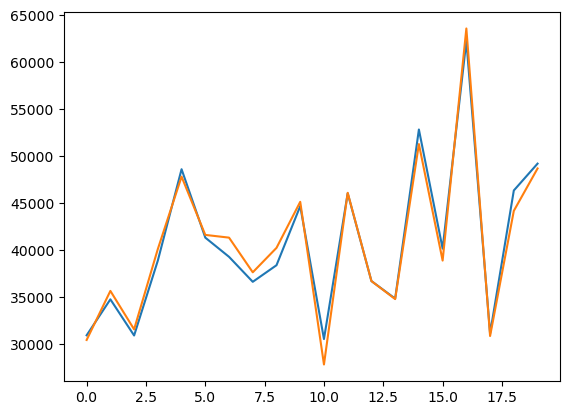

In [37]:
linreg = MyLinearRegression()
features = ['age', 'experience']
linreg.fit(data[features], data['income'])
y_predicted = linreg.predict(data[features])
rmse = mean_squared_error(data['income'], y_predicted) ** 0.5
plt.plot(y_predicted)
plt.plot(data['income'])
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(data[features], data['income'])
linreg.intercept_, linreg.coef_

(31261.689854101285, array([ -99.19535546, 2162.40419192]))